In [2]:
### In this Jupyter notebook I take observations of 100k o
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('Skyserver_12_30_2019 4_49_58 PM.csv')
df.head()
#df['class'].value_counts()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


In [3]:
df.drop(['objid','specobjid','run','rerun','camcol','field','plate','mjd','fiberid'], axis=1, inplace=True) 
#y0 =df['class']
#y =  pd.factorize(df['class'])[0]
print(df.isnull().sum())

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
dtype: int64


In [4]:
df.head(3)

,ra,dec,u,g,r,i,z,class,redshift
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165


In [5]:
df.isnull().sum() # giving me the total null values in the data frame

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
dtype: int64

/anaconda3/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

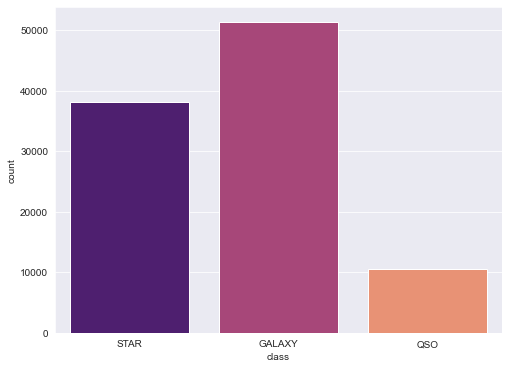

In [6]:
sns.set_style('darkgrid')

plt.figure(figsize = (8,6))

sns.countplot(df['class'], palette = 'magma')

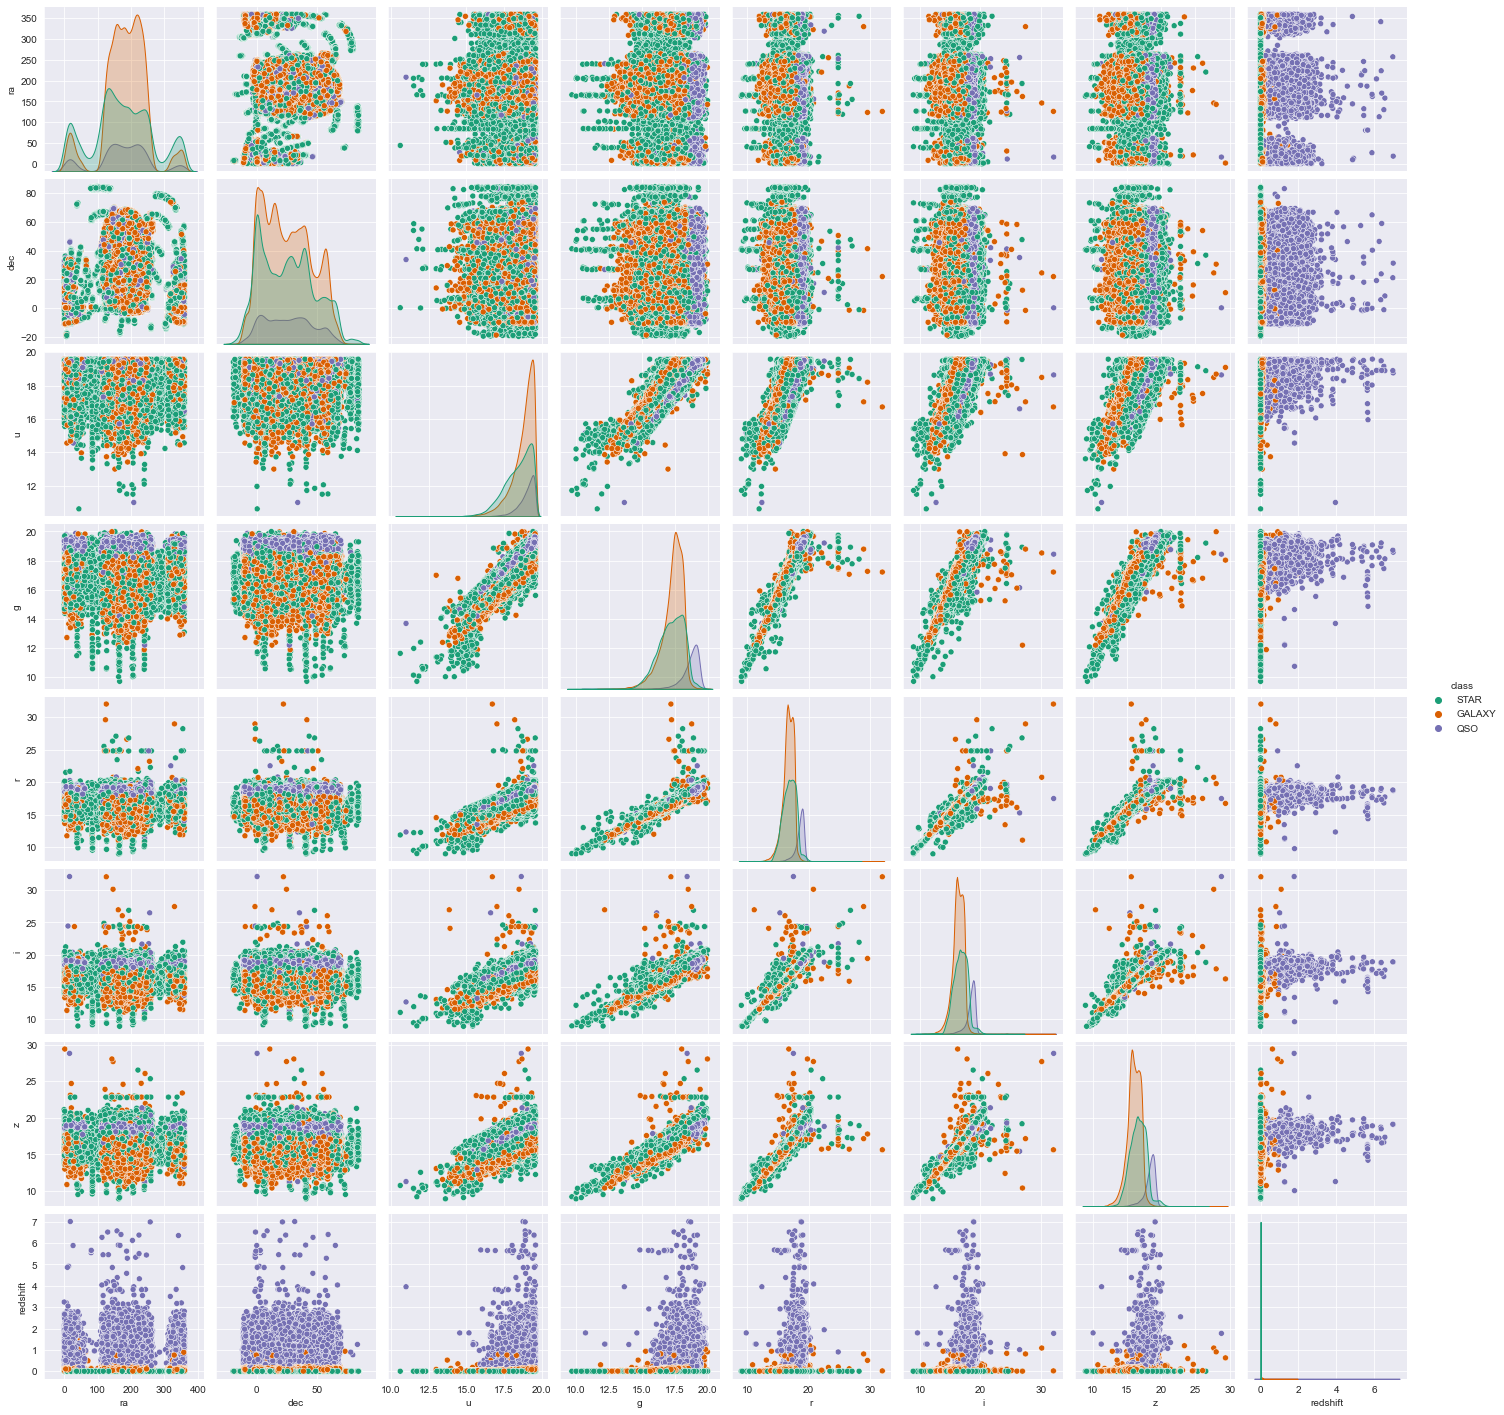

In [19]:
sns.pairplot(data = df, palette = 'Dark2', hue='class')

<AxesSubplot:>

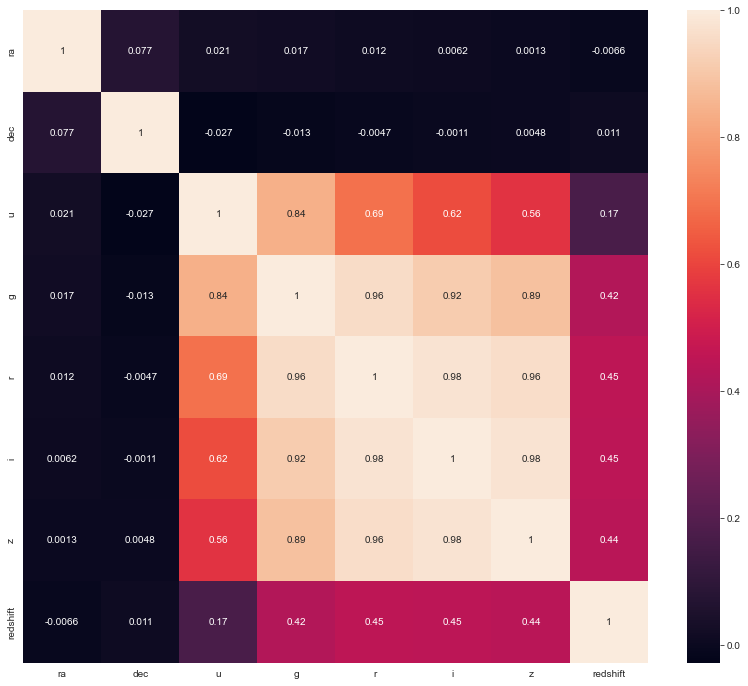

In [7]:
corr = df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr,annot=True)

In [8]:
### Feature Engineering
labels = {'STAR' :1, 'GALAXY': 2, 'QSO': 3}

df.replace({'class':labels}, inplace = True)

#df.head()



In [9]:
X = df.drop('class', axis = 1).values
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [10]:
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

In [11]:
### Logistic Regression
lr = LogisticRegression(max_iter = 120)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Classification Report: \n", classification_report(y_test, y_pred))

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99     11463
           2       0.99      0.98      0.98     15366
           3       0.98      0.93      0.96      3171

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.98     30000
weighted avg       0.98      0.98      0.98     30000

Confusion Matrix: 
 [[11459     0     4]
 [  265 15052    49]
 [    5   208  2958]]
Training Score:  0.9835428571428572
Testing Score:  0.9823


In [14]:
### Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(random_state=49)

model_dtc.fit(X_train, y_train)

accuracies = {}

acc = model_dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 98.67%


In [16]:
### Support Vector Machine 
from sklearn.svm import SVC

model_svm = SVC(random_state = 1)

model_svm.fit(X_train, y_train)

acc = model_svm.score(X_test,y_test)*100

accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 98.19%
